In [ ]:
import pandas as pd


In [ ]:
raw_data=pd.read_csv('earthquakes-2000-01-01-2023-02-12.csv')
#print(raw_data)
print(raw_data.columns)
print(len(raw_data))

Index(['Unnamed: 0', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place',
       'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')
613787


In [ ]:
#Filter out specific location (Turkey: latitude:36-43 longitude:25-45)
filter_location_data=raw_data.loc[(raw_data['latitude'] > 36)&(raw_data['latitude'] < 43)&(raw_data['longitude'] > 25)&(raw_data['longitude'] < 45)] 
print(len(filter_location_data))

7571


In [ ]:
#Dictionary: https://earthquake.usgs.gov/data/comcat/data-eventterms.php
#Filter out by specific columns
#Input: depth/magType/gap/dmin/rms/horizontalError
#/depthError/magError/magNst/time-period(not process yet)
#Output: mag
Input_data=filter_location_data.drop(['Unnamed: 0','latitude','longitude','nst','net','type','id','updated','place','status',
       'locationSource', 'magSource'], axis=1)
print(Input_data.columns)

Index(['time', 'depth', 'mag', 'magType', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magNst'],
      dtype='object')


In [ ]:
#Get time period(not process)
print(Input_data.iloc[0]['time'])
print(Input_data.iloc[1]['time'])

2000-01-01T05:13:59.100Z
2000-01-01T05:17:12.900Z


Covariance: 
[[4.05700611e+02 4.74072627e-02]
 [4.74072627e-02 4.11279158e-01]]
Correlation: 
         depth      mag
depth  1.00000  0.00367
mag    0.00367  1.00000


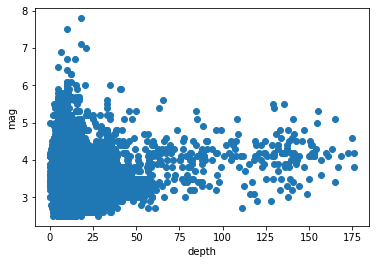

In [ ]:
#Find covariance from mag and depth
#depth: 0-30km very shallow earthquakes; 30-70 shallow earthquakes; 
#70-300 intermediate earthquakes; 300-700 deep earthquakes
#Ref: https://www.usgs.gov/programs/earthquake-hazards/determining-depth-earthquake
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(Input_data['depth'],Input_data['mag'])
plt.xlabel('depth')
plt.ylabel('mag')
print('Covariance: ')
print(np.cov(Input_data['depth'],Input_data['mag']))
print('Correlation: ')
print(Input_data[['depth','mag']].corr())
#Observation: many earthquakes happen under very shallow depth

7571
112.0
Covariance: 
[[ 3.23045722e+03 -2.08809201e+01]
 [-2.08809201e+01  4.11279158e-01]]
Correlation: 
          gap       mag
gap  1.000000 -0.572861
mag -0.572861  1.000000


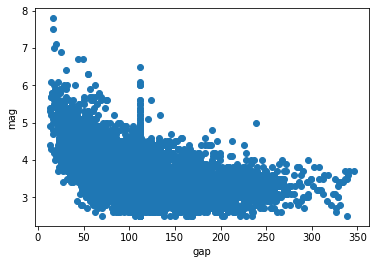

In [ ]:
#Find covariance from mag and gap
#pad null with median, 1325 rows null before padding
#print(Input_data['gap'].isnull().values.sum())#print null number
Input_data['gap'] = Input_data['gap'].fillna(Input_data['gap'].median())
print(len(Input_data['gap']))
print(Input_data['gap'].median())
plt.scatter(Input_data['gap'],Input_data['mag'])
plt.xlabel('gap')
plt.ylabel('mag')
print('Covariance: ')
print(np.cov(Input_data['gap'],Input_data['mag']))
print('Correlation: ')
print(Input_data[['gap','mag']].corr())
#Observation: Gap and mag seem to correlated.(Smaller gap happens larger earthquake)
#Note:In general, the smaller gap, the more reliable is the calculated horizontal position of the earthquake.

7571
6525
Covariance: 
[[ 4.33849517 -0.65618814]
 [-0.65618814  0.41127916]]
Correlation: 
          dmin       mag
dmin  1.000000 -0.491236
mag  -0.491236  1.000000


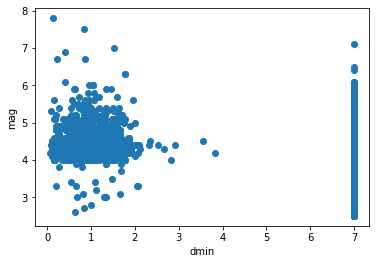

In [ ]:
#Find covariance from mag and dmin
#pad null with 7, 6525 rows null before padding
print(len(Input_data['dmin']))
print(Input_data['dmin'].isnull().values.sum())#print null number
Input_data['dmin'] = Input_data['dmin'].fillna(7)
plt.scatter(Input_data['dmin'],Input_data['mag'])
plt.xlabel('dmin')
plt.ylabel('mag')
print('Covariance: ')
print(np.cov(Input_data['dmin'],Input_data['mag']))
print('Correlation: ')
print(Input_data[['dmin','mag']].corr())
#Observation: dmin and mag seem to correlated.(earthquake mainly concentrate between dmin 0.4-1.8)
#print(Input_data.groupby('mag')['dmin'].agg('median').sort_values())

5616
Covariance: 
[[ 0.51279008 -0.27764646]
 [-0.27764646  0.41127916]]
Correlation: 
         rms      mag
rms  1.00000 -0.60458
mag -0.60458  1.00000


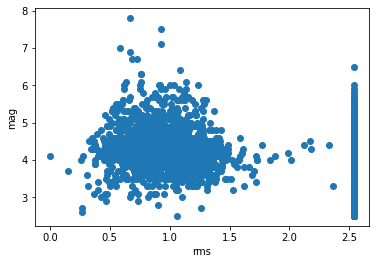

In [ ]:
#Find covariance from mag and rms
#pad null with 2.5, 5616 rows null before padding
print(Input_data['rms'].isnull().values.sum())#print null number
Input_data['rms'] = Input_data['rms'].fillna(Input_data['rms'].max())
plt.scatter(Input_data['rms'],Input_data['mag'])
plt.xlabel('rms')
plt.ylabel('mag')
print('Covariance: ')
print(np.cov(Input_data['rms'],Input_data['mag']))
print('Correlation: ')
print(Input_data[['rms','mag']].corr())
#Observation: rms and mag seem to correlated.(most earthquakes happen between 0.4-1.5)

6448
Covariance: 
[[12.98476399 -1.13607254]
 [-1.13607254  0.41127916]]
Correlation: 
                 horizontalError      mag
horizontalError          1.00000 -0.49161
mag                     -0.49161  1.00000


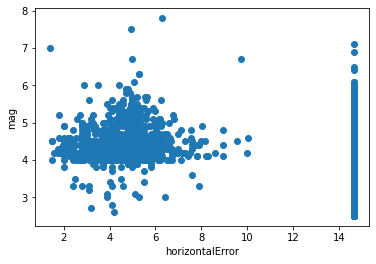

In [ ]:
#Find covariance from mag and horizontalError
print(Input_data['horizontalError'].isnull().values.sum())#print null number
Input_data['horizontalError'] = Input_data['horizontalError'].fillna(Input_data['horizontalError'].max())
plt.scatter(Input_data['horizontalError'],Input_data['mag'])
plt.xlabel('horizontalError')
plt.ylabel('mag')
print('Covariance: ')
print(np.cov(Input_data['horizontalError'],Input_data['mag']))
print('Correlation: ')
print(Input_data[['horizontalError','mag']].corr())
#Observation: horizontalError and mag seem to correlated.(most earthquakes happen between 1-8)

6115
Covariance: 
[[5.06880218 0.22688242]
 [0.22688242 0.41127916]]
Correlation: 
            depthError       mag
depthError    1.000000  0.157137
mag           0.157137  1.000000


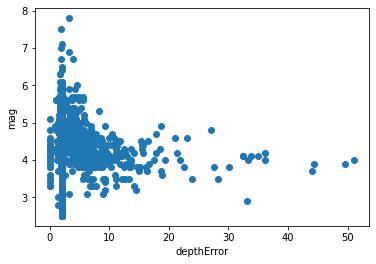

In [ ]:
#Find covariance from mag and depthError
print(Input_data['depthError'].isnull().values.sum())#print null number

Input_data['depthError'] = Input_data['depthError'].fillna(Input_data['depthError'].median())
plt.scatter(Input_data['depthError'],Input_data['mag'])
plt.xlabel('depthError')
plt.ylabel('mag')
print('Covariance: ')
print(np.cov(Input_data['depthError'],Input_data['mag']))
print('Correlation: ')
print(Input_data[['depthError','mag']].corr())


6385
Covariance: 
[[ 0.02303679 -0.05096864]
 [-0.05096864  0.41127916]]
Correlation: 
          magError       mag
magError  1.000000 -0.523629
mag      -0.523629  1.000000


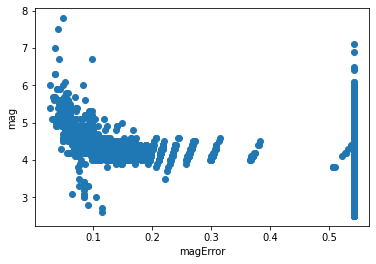

In [ ]:
#Find covariance from mag and magError
print(Input_data['magError'].isnull().values.sum())#print null number
Input_data['magError'] = Input_data['magError'].fillna(Input_data['magError'].max())
plt.scatter(Input_data['magError'],Input_data['mag'])
plt.xlabel('magError')
plt.ylabel('mag')
print('Covariance: ')
print(np.cov(Input_data['magError'],Input_data['mag']))
print('Correlation: ')
print(Input_data[['magError','mag']].corr())


5350
Covariance: 
[[ 4.99286531e+04 -9.55403037e+01]
 [-9.55403037e+01  4.11279158e-01]]
Correlation: 
         magNst      mag
magNst  1.00000 -0.66672
mag    -0.66672  1.00000


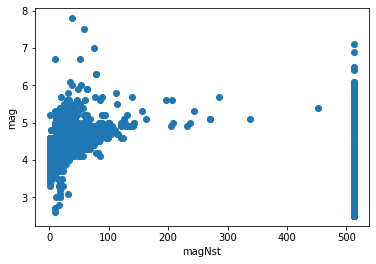

In [ ]:
#Find covariance from mag and magNst
print(Input_data['magNst'].isnull().values.sum())#print null number
Input_data['magNst'] = Input_data['magNst'].fillna(Input_data['magNst'].max())
plt.scatter(Input_data['magNst'],Input_data['mag'])
plt.xlabel('magNst')
plt.ylabel('mag')
print('Covariance: ')
print(np.cov(Input_data['magNst'],Input_data['mag']))
print('Correlation: ')
print(Input_data[['magNst','mag']].corr())

In [ ]:
#Build Bayesian Linear Regression
from scipy.stats import multivariate_normal, norm
from numpy.random import seed, uniform, randn
from numpy.linalg import inv
from sklearn.model_selection import train_test_split

In [ ]:
#Split data
Split_dataX=Input_data.drop(['time','mag', 'magType'], axis=1)
Split_dataY=Input_data['mag']
trainX, testX = train_test_split(Split_dataX, test_size=0.1,shuffle=False)
trainY, testY = train_test_split(Split_dataY, test_size=0.1,shuffle=False)
print(trainX.columns)
print(testX.head())
print(testY.head())
#Split data end

Index(['depth', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError',
       'magError', 'magNst'],
      dtype='object')
        depth    gap   dmin   rms  horizontalError  depthError  magError  \
496514  10.00  103.0  1.696  0.74              4.1         1.3     0.076   
497015  10.00   85.0  0.547  1.38              4.0         2.0     0.085   
497125  10.00   86.0  1.023  0.73              4.2         1.9     0.142   
497763  73.67   42.0  0.608  0.67              5.5         5.8     0.053   
497879  47.70   41.0  0.149  0.89              6.8         4.1     0.058   

        magNst  
496514    23.0  
497015    18.0  
497125    14.0  
497763   110.0  
497879    29.0  
496514    3.7
497015    3.4
497125    4.3
497763    4.8
497879    5.1
Name: mag, dtype: float64


In [ ]:
#Test data start
#Test_data_input=Input_data.drop(['time','mag', 'magType', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst'], axis=1)
#print("Test_data_input row length: ",len(Test_data_input))
#print(Test_data_input.head())
#Test_data_ouput=Input_data['mag']
#print("Test_data_output row length: ",len(Test_data_ouput))
#print(Test_data_ouput.head())

#Test data end
def f(x, a): return a[0] * x[0] + a[1] * x[1] + a[2] * x[2] + a[3] * x[3] + a[4] * x[4] + a[5] * x[5] + a[6] * x[6] + a[7] * x[7] + a[8]
def sample_vals(X, T, ix):
    """
    
    Returns
    -------
    Phi: The linear model transormation
    t: the target datapoint
    """
    X_numpy=X.to_numpy()
    x_in = X_numpy[ix]
    #Phi = np.c_[np.ones_like(x_in),x_in]
    Phi = np.c_[x_in.reshape(1,8),[[1.0]]].T
    T_numpy=T.to_numpy()
    t = T_numpy[[ix]].reshape(1,1)
    return Phi, t
def posterior_w(phi, t, S0, m0):
    """
    Compute the posterior distribution of 
    a Gaussian with known precision and conjugate
    prior a gaussian
    
    Parameters
    ----------
    phi: np.array(N, M)
    t: np.array(N, 1)
    S0: np.array(M, M)
        The prior covariance matrix
    m0: np.array(M, 1)
        The prior mean vector
    """
    SN = inv(inv(S0) + beta * Phi.T @ Phi)
    mN = SN @ (inv(S0) @ m0 + beta * Phi @ t)
    return SN, mN
def check_convergence(coef_old, coef_new, tol, iters, max_iteration):
    coef_change = np.abs(coef_old - coef_new)
    return not (np.any(coef_change>tol) and iters < max_iteration)
def Bayesian_predic(coef,input):
    output = f(input, coef)
    return output
sigma = 0.2
#beta = (1 / sigma) ** 2 # precision
#alpha = 2
beta=0.0007
alpha=0.0001
SN = np.eye(9) * alpha
mN = np.zeros((9, 1))
#print("Prior parameter")
#print("S0:")
#print(SN)
#print("m0:", mN)
Iteration=len(trainX) #len(Test_data_input)
tolerance=0.00001
coefs_converged=False
itc=1
for itc in range(0, Iteration):
  #Get phi (input and w0) and t (output)
  Phi, t = sample_vals(trainX, trainY, itc)#sample_vals(Test_data_input, Test_data_ouput, itc)
  #Get updated SN and mN by posterior_w
  mN_old=mN
  SN, mN = posterior_w(Phi, t, SN, mN)
  #Check if it is converaged
  coefs_converged = check_convergence(mN_old, mN, tolerance, itc, Iteration)  
  if coefs_converged == True:
    print("Break for convergence.")
    break
if coefs_converged == False: 
  print("No convergence")
print("alpha:",alpha," beta",beta)
print("After ",itc," iterations")
#print("SN:")
#print(SN)
print("mN:")
#print(mN.shape)
print(mN)
print("Predict: ",Bayesian_predic(mN,[10.00,103.0,1.696,0.74,4.1,1.3,0.076,23.0]))
print("Ground Truth: ",testY.iloc[0])
#You can write the large number with alpha = 2 and beta =25 (from hw2)
#After tuning for 15 min, beta=0.001 and alpha=0.0001 seem to more make sence
#I think there is a better number than 0.001 and 0.0001.

Break for convergence.
alpha: 0.0001  beta 0.0007
After  1220  iterations
mN:
[[-0.01246334]
 [ 0.01623005]
 [-0.01602455]
 [-0.01750595]
 [-0.01371692]
 [-0.0174646 ]
 [-0.01797261]
 [ 0.0977219 ]
 [-0.01783445]]
Predict:  [3.6563896]
Ground Truth:  3.7


In [ ]:
#validation
def Get_predic(coef,input):
    input_numpy=input.to_numpy()
    output=np.arange(len(input_numpy), dtype=float)
    for idx in range(len(input_numpy)):
      output[idx] = f(input_numpy[idx], coef)
    return output
test_prediction = testY
test_prediction=Get_predic(mN,testX)
print("Baysian linear Mean Square Error:")
print(np.square(np.subtract(testY,test_prediction)).mean())
#validation end

Baysian linear Mean Square Error:
9.445365719225485


In [ ]:
#Build regular linear regression
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(trainX, trainY)
linear_predicted = regr.predict(testX)
#print(linear_predicted)
print("Regular linear Mean Square Error:")
print(np.square(np.subtract(testY,linear_predicted)).mean())
print(f"slope: {regr.coef_}")

Regular linear Mean Square Error:
0.21100232341172254
slope: [ 8.14561606e-06 -3.47080350e-03  9.15624033e-03 -2.59369422e-01
  1.81207083e-02 -8.02094786e-03 -3.16099147e-01 -1.04114138e-03]
